# Genetics and Curve Fitting for Polynomial Equations

<html>
<div>
  <span style="font-family: Poppins; font-size:30px; color: black;"> <br/> University of Tehran <br/>
</div>
<span style="font-family: Poppins; font-size:15pt; color: black; vertical-align: middle;"> Mobina Mehrazar </span><br>
<span style="font-family: Poppins; font-size:15pt; color: black; vertical-align: middle;"> 810100216 </span>

</html>

### Problem Description

In this project, the primary objective is to leverage a genetic algorithm to tackle the challenge of fitting a polynomial curve to a set of provided data points. The genetic algorithm is utilized to determine the optimal coefficients of the polynomial equation based on the available data. The goal is to use the genetic algorithm as a computational approach to establish a mathematical relationship between an independent variable (x) and a dependent variable (y) by iteratively evolving and selecting candidate solutions, ultimately arriving at the best-fitting polynomial equation that accurately models the data.

In [1]:
from typing import NamedTuple, List
import random
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt

+ typing.NamedTuple allows you to define simple classes with named fields.
+ List is used to specify the type of certain variables, indicating that they should be lists of a particular data type.
+ The random module provides functions for generating random numbers and making random selections.
+ The copy module provides functions for creating shallow and deep copies of objects in Python.
+ The sys library is imported to write in file.
+ NumPy is a powerful library for numerical computations in Python. It provides support for arrays, matrices, and mathematical functions.
+ Matplotlib is a popular library for creating data visualizations in Python.

# part one : Defining Basic Concepts

In [2]:
class Consts(NamedTuple):
    maxGenerations: int
    populationSize: int
    coefficientRange: tuple
    polynomialDegree: int
    eliteSelectionProbability: float
    crossoverProbability: float
    mutationProbability: float
    flipProbability: float

For enhanced code clarity and error reduction, a dedicated class for constants has been introduced. This class serves as a repository for essential values used throughout the execution of the genetic algorithm. By centralizing these constants, it not only fosters readability but also ensures that parameters are consistently and comprehensibly employed during the genetic algorithm's runtime.

In [3]:
class Chromosome:
    def __init__(self, _coeff):
        self.coefficients: List[int] = _coeff
        self.degree: int = len(_coeff)
        self.fitness: int = 0
    
    def evaluatePolynomial(self, x):
        return np.polyval(self.coefficients, x)
    
    def calculateFitness(self, trainingData):
        predicted = self.evaluatePolynomial([point[0] for point in trainingData])
        difference = [abs(predicted[i] - trainingData[i][1]) for i in range(len(trainingData))]
        self.fitness = 1 / (1 + sum(difference))
        return self.fitness

The Chromosome class is a fundamental component of the genetic algorithm. Each instance of this class represents a potential solution, or an individual within the population. It encapsulates critical attributes, including the coefficients of a polynomial equation, the degree of the polynomial, and the fitness score. These attributes play a pivotal role in the genetic algorithm's ability to adapt and evolve solutions.
+ The evaluatePolynomial method within the Chromosome class is responsible for calculating the predicted values of the polynomial equation based on the provided coefficients.
+ The calculateFitness method quantifies the fitness of the Chromosome by comparing the predicted values with the actual training data. The resulting fitness score represents the quality of the polynomial as a solution.

In [4]:
def generateRandomCoefficient(consts):
    return random.randint(consts.coefficientRange[0], consts.coefficientRange[1]);

This is a function to generate random integer for polynomial coefficient.

In [5]:
def adjust_polynomial_degree(chromosome, constants):
    while chromosome.coefficients[0] == 0:
        chromosome.coefficients[0] = generateRandomCoefficient(constants)

This function modifies the polynomial degree of a chromosome to match the desired degree.

# part two : Generating Initial Population

In [6]:
def initializePopulation(consts, trainingData):
    population: list[Chromosome] = [None] * consts.populationSize
    for index in range(consts.populationSize):
        coeff = [generateRandomCoefficient(consts) for _ in range(consts.polynomialDegree+1)]
        population[index] = Chromosome(coeff)
        adjust_polynomial_degree(population[index], consts)
    evaluateFitness(population, trainingData)
    return population

Its primary purpose is to create the initial population of potential solutions (represented by instances of the Chromosome class) from which the genetic algorithm will evolve and select candidates.

This function takes as input the consts object, which encapsulates the algorithm's parameters, and the trainingData representing the observed data points. Using these parameters, the function initializes a population of Chromosomes. 

The function iterates over the population size specified in the consts and generates random coefficients within the provided coefficient range. It ensures that the coefficients are appropriately initialized and do not have a zero value for the highest-degree term. This step helps diversify the initial population. The evaluateFitness function is called to calculate the fitness of each Chromosome within the newly created population.

# part three : Implementation and Specification of the Fitness Function

The fitness function is defined as:

$$ \frac{1}{1 + |chromosome - goal|}$$

    "Chromosome" represents a set of coefficients used to define a mathematical curve.
    "Goal" is a target value or desired outcome.
The fitness value is determined by the formula, and it has a range between 0 and 1.

The primary characteristic of this fitness function is that it quantifies how well the curve, defined by the coefficients in the "chromosome," matches the "goal." A fitness of 1 indicates a perfect fit, meaning that the curve generated by the chromosome perfectly aligns with the desired outcome, resulting in zero error. As the fitness value approaches 0, it indicates a poorer fit between the curve and the goal.

In [7]:
def evaluateFitness(population, trainingData):
    for chromo in population:
        if chromo.calculateFitness(trainingData) == 1:
            return chromo
    return chromo

Its primary role is to iteratively evaluate and assign fitness scores to the candidate solutions.

The function takes two important inputs: population, which is a list of Chromosomes representing potential solutions, and trainingData, a dataset containing observed data points that serve as the basis for fitness evaluation.

In some cases, the best-fit solution that satisfies the training data is identifies by it.

# part four : Implementation of Crossover and Mutation and the Generation of the Next Generation

In [8]:
def performCrossover(matingPool, workingPopulation, consts): 
    for i in range(0, len(matingPool), 2):
        if i == len(matingPool) - 1:
            break
        if consts.polynomialDegree == 0:
            point = 0
        else:
            point = random.randint(0, consts.polynomialDegree-1)
        if random.random() < consts.crossoverProbability:
            workingPopulation[i].coefficients = matingPool[i].coefficients[:point] + matingPool[i+1].coefficients[point:]
            workingPopulation[i+1].coefficients = matingPool[i+1].coefficients[:point] + matingPool[i].coefficients[point:]

In genetic algorithms, crossover (also known as recombination) is a genetic operator used to create new individuals (chromosomes) by combining the genetic material of two parent individuals. This process simulates the concept of genetic recombination in biology.

"if i == len(matingPool) - 1: break", is used to handle the case where the number of parents in the matingPool is odd. In this algorithm, crossover requires an even number of parents, with each pair of parents contributing genetic material to create offspring.

The crossoverProbability dictates the occurrence of crossover, with the crossover point being randomly selected. This probability parameter governs the application of one-point crossover to two adjacent chromosomes.

In [9]:
def applyMutation(workingPopulation, consts): 
    for chromo in workingPopulation:
        if random.random() < consts.mutationProbability:
            for i in range(len(chromo.coefficients)):
                if random.random() < consts.flipProbability:
                    chromo.coefficients[i] = generateRandomCoefficient(consts)
            adjust_polynomial_degree(chromo, consts)

Bit flip mutation provides a mechanism for introducing small, random changes into the genetic material, which can help the algorithm explore the search space more effectively and escape local optima.

When a mutation occurs for specific chromosome, it alters each individual coefficient of the chromosome with specific probability.

Each coefficient in a chromosome has a certain probability of being flipped or changed to a random value within the specified coefficient range. This mutation strategy is often used when working with discrete values. 
The while loop enters when the coefficient of the largest polynomial degree is set to zero in this for loop.

# part five : Development of a Genetic Algorithm for the Problem

In [10]:
def selectTopCandidates(population, eliteCount):
    workingPopulation = copy.deepcopy(population)
    carriedPool = sorted(workingPopulation, reverse=True, key=lambda chromo: chromo.fitness)
    return carriedPool[:eliteCount]

It selects the top-performing individuals (chromosomes) from the population by sorting the populaton according to its individual fitness. Elite individuals are those with the highest fitness values, and they are typically preserved from one generation to the next to ensure that the best solutions are not lost during the evolutionary process.

In [11]:
def selectParents(population):
    workingPopulation = population.copy()
    matingPool = []
    fitnessSum = sum(chromo.fitness for chromo in workingPopulation)
    selectionProbabilities = [(chromo.fitness / fitnessSum) for chromo in workingPopulation]
    cumulativeProbabilities = list(np.cumsum(selectionProbabilities))
    for _ in workingPopulation:
        random_value = random.random()
        idx = np.searchsorted(cumulativeProbabilities, random_value)
        matingPool.append(workingPopulation[idx])
    return matingPool

This function ensures that chromosomes with higher fitness have a greater chance of being selected as parents, as it uses a probability-based selection approach. This mimics the concept of natural selection, where fitter individuals are more likely to pass on their genes to the next generation.

It creates a deep copy of the population. It's important to note that this copy is made to avoid modifying the original population during the selection process.

Calculates the sum of fitness values for all individuals in the working population. For each chromosome in the working population, it calculates a probability value by dividing the individual's fitness by the total fitness sum. This reflects the likelihood of each chromosome being selected as a parent.

It generates a list called cumulative_probabilities using the accumulate function from the itertools module. Cumulative probabilities are essentially the cumulative sum of selection probabilities. It forms a range from 0 to 1, where each value represents the probability of selecting a chromosome up to that point.

"np.searchsorted(cumulativeProbabilities, random_value)" performs a binary search on the cumulativeProbabilities list to find the index where random_value would be inserted while maintaining the sorted order. Binary search is chosen for its efficiency and consistency in selecting parents in a genetic algorithm. 

In [12]:
def geneticAlgorithm(population, consts, trainingData):
    eliteCount = int(consts.eliteSelectionProbability * len(population))
    with open('genetic_algorithm_output.txt', 'w') as output_file:
        original_stdout = sys.stdout
        sys.stdout = output_file
        try:
            for _ in range(consts.maxGenerations):
                carriedPool = selectTopCandidates(population, eliteCount)
                matingPool = selectParents(population)

                performCrossover(matingPool, population, consts)
                applyMutation(population, consts)

                population = carriedPool + population[:consts.populationSize - eliteCount]
                bestFitnessChromo = evaluateFitness(population, trainingData)

                maximumFitnessedChromo = max(population, key=lambda chromo: chromo.fitness)
                print("epoch: ", _, "max:  ", "{:.6f}".format(maximumFitnessedChromo.fitness))

                if bestFitnessChromo.fitness == 1:
                    return bestFitnessChromo
                random.shuffle(population)
        finally:
            sys.stdout = original_stdout

    return max(population, key=lambda chromo: chromo.fitness)

Orchestrates the entire genetic algorithm process, from initializing the population to evolving it over multiple generations. It uses selection, crossover, and mutation to explore the search space and identify the best solution based on the defined fitness function.

The eliteSelectionProbability is a constant that determines what proportion of the population is considered elite.
The function then enters a loop that runs for a maximum number of generations.
+ "selectTopCandidates" function is called to identify the elite candidates.

+ "selectParents" function is called to create a mating pool of potential parent chromosomes based on their fitness.

+ "performCrossover" function is called to perform crossover operations on the mating pool. Crossover is a genetic operation that combines the genetic material of two parents to create offspring.

+ "applyMutation" function is called to introduce random mutations into the population. Mutation is a genetic operation that introduces small, random changes to individual chromosomes.

+ Then combines the elite candidates (carriedPool) with the non-elite portion of the population to create the new population for the next generation. The non-elite individuals are selected based on their fitness.

+ "evaluateFitness" function is called to determine the fitness of each chromosome in the population.

And finaly the population is shuffled for the next iteraion.

Also identifies if there is a best-performing chromosome in the current generation by the if statement above. If there is no best-performing chromosome, it finds the chromosome with the maximum fitness in the last generation.

# Testcases
these testcases are handwritten. and the amount of maxGeneration and populationSize is set at the common amounts. note that I have included more explanation about this two parameters in Part6.

These values are set according to problem Complexity empirical Testing and computational Resources.

In [13]:
consts = Consts(
    maxGenerations = 2000,
    populationSize = 200,
    coefficientRange = (-12, 12),
    polynomialDegree = 7,
    eliteSelectionProbability = 0.1,
    crossoverProbability = 0.65,
    mutationProbability = 0.5,
    flipProbability = 0.45
)
trainingData = [(1, 7), (2, 527), (3, 9723), (0, 9), (-1, 11), (-2, -677), (-3, -12153)]

# consts = Consts(
#     maxGenerations = 1000,
#     populationSize = 100,
#     coefficientRange = (-6, 4),
#     polynomialDegree = 3,
#     eliteSelectionProbability = 0.1,
#     crossoverProbability = 0.65,
#     mutationProbability = 0.5,
#     flipProbability = 0.45
# )
# trainingData = [(0, 1), (1, 0), (2, -5), (-1, -8)]

In [14]:
def plotFittedCurve(coefficients, trainingData):
    x = np.array([point[0] for point in trainingData])
    y = np.array([point[1] for point in trainingData])
    plt.figure()

    plt.scatter(x, y, label='Data Points', color='red')
    xValues = np.linspace(min(x) - 3, max(x) + 3, 100)
    yValues = bestChromosome.evaluatePolynomial(xValues)
    plt.plot(xValues, yValues, label='Polynomial Curve and Data Points', color='blue')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Polynomial Plot')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
bestChromosome = geneticAlgorithm(initializePopulation(consts, trainingData), consts, trainingData)

A message is printed at each iteration to provide insights into the algorithm's progress. I've saved it in a genetic_algorithm_output.txt file. It consists of the current generation number indicated as "epoch: #" and the fitness score of the top-performing chromosome, displayed with six decimal places.

+ In the early epochs, the maximum fitness observed is quite low, ranging from 0.001715 to 0.005319. This suggests that the initial population of chromosomes doesn't have highly fit individuals. The algorithm is exploring the search space and trying to find better solutions.

+ The maximum fitness remains at 0.005319 for several epochs. This could indicate that the algorithm is stuck in a local optima, and it struggles to find better solutions during this period.

+ Starting from epoch 18, there is a sudden jump in the maximum fitness to 0.018519. This is a significant improvement, and it indicates that the genetic algorithm has likely found a more promising solution in the search space. This improvement continues until epoch 49.

+ After epoch 50, the maximum fitness remains at 0.020000, which is the highest fitness value achieved during this run. This indicates that the genetic algorithm has converged to a solution with a fitness value of 0.020000, and it remains consistent from epoch 50 to 249.

+ The algorithm reaches its best solution in epoch 249 with a fitness value of 1.000000. This is often a sign that the genetic algorithm has successfully converged to an optimal or near-optimal solution, as a fitness value of 1.000000 suggests a perfect solution according to evaluation criteria.

not that i have wrote these for the file output.txt and for the testcase:
consts = Consts(

    maxGenerations = 2000,

    populationSize = 200,
    
    coefficientRange = (-12, 12),
    
    polynomialDegree = 7,
    
    eliteSelectionProbability = 0.15,
    
    crossoverProbability = 0.65,
    
    mutationProbability = 0.5,
    
    flipProbability = 0.45

)

trainingData = [(1, 7), (2, 527), (3, 9723), (0, 9), (-1, 11), (-2, -677), (-3, -12153)]

best_coefficients found as:     [5, -2, 1, 3, -9, -1, 1, 9]
best_fitness is calculated as:  1.0


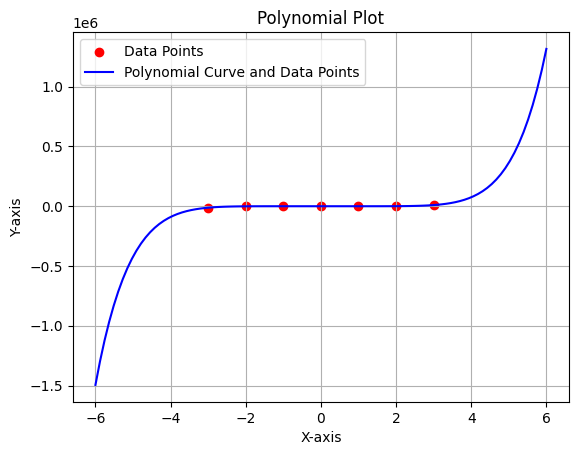

In [16]:
print("best_coefficients found as:    ", bestChromosome.coefficients)
print("best_fitness is calculated as: ", bestChromosome.fitness)

# printPolynomial(bestChromosome.coefficients)

plotFittedCurve(bestChromosome.coefficients, trainingData)

For a clearer view of this picture and its associated curve, it's advisable to zoom in. For example when zooming in, we can see that the amount of x=0 is y=9.

The curve seems to fit well, and the printed coefficients match the expected values for the data points.

Note that for a better experience of curve fitting in a genetic algorithm, we can adjust the constants carefully.

# Conclusion
The code successfully applies a genetic algorithm to curve fitting. It leverages genetic operators like crossover and mutation to evolve a population of candidate polynomials, ultimately optimizing the polynomial coefficients to fit a given dataset. The genetic algorithm iterates over generations, gradually improving the population's fitness as it was described in this report.

# part six : Evaluation of Results

## questions

### 1. A very low or very high initial population can create what difficulties?

In a small initial population there are fewer potential solutions to work with. This can lead to premature convergence, where the algorithm quickly settles on suboptimal solutions and fails to explore the search space effectively. Also, With a small population, there are fewer chances for genetic operators like mutation and crossover to create new solutions. This can lead to the algorithm stagnating and getting stuck in local optima, failing to find better solutions.

A large initial population requires more computational resources and time to evaluate fitness and perform genetic operations. This can make the algorithm slower and less efficient, especially when dealing with complex problems or limited computing resources. Also, it can lead to redundancy and over-representation of similar solutions. This redundancy can make it harder for the algorithm to identify and exploit the best solutions in the population.
Storing a large population consumes more memory.

### 2. If the population size increases in each iteration, what effect does it have on the accuracy and speed of the algorithm?

+ Pos: 
A larger population provides more diversity and a broader sampling of potential solutions. There's a higher likelihood of finding better solutions, which can lead to increased algorithm accuracy. The algorithm has a better chance of converging to a global optimum or a high-quality solution.

+ Neg:
Larger populations require more time to evaluate fitness and perform genetic operations, which can slow down the convergence of the algorithm. As the population size grows, the rate of improvement in solutions may diminish. A point can be reached where adding more individuals to the population provides minimal benefits in terms of finding better solutions. The goal is to achieve convergence by retaining the chromosomes that are closer to the desired solution and eliminating those that are farther from it. Adding more individuals in each iteration does not align with our objective of achieving convergence.

### 3. Explain and compare the impact of each of the crossover and mutation operations. Can only one of them be used? Why?

Crossover is responsible for combining genetic material from two parent chromosomes to produce one or more offspring.
Promotes exploration by creating diversity in the population. It can lead to the discovery of entirely new solutions by combining features from different parents. Crossover is more likely to have a significant impact on the population's genetic diversity over a short period. Can be particularly useful when the population is stuck in a suboptimal region of the search space. It helps escape local optima by combining good features from different individuals.


Mutation introduces small, random changes to individual chromosomes. It serves as a source of genetic diversity.
It has a more localized impact compared to crossover. It introduces small, random changes to a single chromosome and can lead to incremental improvements in existing solutions.
It helps maintain diversity in the population and prevents premature convergence. It can fine-tune solutions and help them adapt to changing conditions. Over time, these small changes can accumulate and contribute to the exploration of the search space.

In most cases, it is not advisable to use only one of them. Both crossover and mutation serve important roles in a genetic algorithm:
+ Crossover primarily focuses on diversity by creating new combinations of genetic material. In contrast, mutation is more about refinement, making small adjustments to existing solutions. Using both allows the algorithm to balance the need for exploration and exploitation.

+ Crossover helps explore the search space, while mutation prevents premature convergence by introducing local exploration. A combination of both operators ensures a more comprehensive exploration of the search space, making it more likely to find a global optimum.

+ Crossover can sometimes disrupt good solutions, but mutation can fine-tune them. Combining both operations allows the algorithm to both explore new regions and refine promising solutions.

Crossover is done with much higher probability that mutation. The crossover probability is usually at least 80% and the mutation probability is usually at most 5%.
If we only use crossover, we may stop at a local maxima, and if we only use mutation, we may not be able to find the best solution as a local extermum cannot be the best solution.
Striking the right balance between these two operations is a key aspect of fine-tuning a genetic algorithm for a particular problem.

### 4. In your opinion, what solutions are available to arrive at a quicker solution to this specific problem?

By fine-tuning the algorithm's parameters, such as population size, crossover and mutation rates, and the number of generations, we can tailor its behavior to better suit the problem at hand.

For instance, if you notice that the algorithm's progress has stalled, you can dynamically adjust parameters, like increasing the mutation rate, to promote exploration and overcome stagnation. 

Additionally, I've incorporated a termination condition within the 'geneticAlgorithm' that halts the loop when the fitness of chromosomes in the new generation reaches the desired threshold, which in this case is set to 1. This condition serves as an early stopping mechanism, allowing the algorithm to exit once it has found a solution meeting the specified criteria. 

The design and evaluation of the fitness function play a pivotal role in guiding the algorithm toward the desired solutions.

### 5. Despite using these methods, it is still possible for chromosomes to remain unchanged after several more stages. Explain the reason behind this occurrence and the challenges it poses. What suggestions do you have for resolving this issue?

Reasons for Chromosomes Remaining Unchanged:

+ Stagnation can occur when the population lacks genetic diversity. If the initial population or the genetic operators (crossover and mutation) fail to introduce new genetic material, the algorithm becomes trapped in a limited portion of the search space.

+ The choice of genetic operators may not be suitable for the problem. Ineffective crossover or mutation operators can fail to generate new solutions or introduce meaningful diversity into the population.

+ The population may have already converged to a local optimum, where further improvements are challenging to achieve. This can happen when the algorithm quickly identifies a good solution but fails to explore other regions of the search space.

+ Genetic algorithms are inherently stochastic, and random chance can result in populations that remain unchanged for a certain number of generations. Small population sizes can exacerbate this effect.

Challenges and Issues:

+ Stagnation prevents the algorithm from further improving solutions, potentially leading to suboptimal or incomplete results.

+ Continually running the algorithm with an unchanging population consumes computational resources without yielding any benefits.

Suggestions for Resolving Stagnation:

+ Ensure that the initial population is diverse, and use genetic operators that introduce variation effectively. Consider using techniques like tournament selection and elitism to maintain diversity.

+ Test different crossover and mutation operators to identify those that are more suitable for the problem. Novel operators, such as uniform crossover or non-uniform mutation, can help in certain cases.

+ Implement adaptive strategies that monitor the algorithm's progress and adjust parameters, such as mutation rates or population size, to encourage exploration when stagnation is detected.

+ Combine the genetic algorithm with other optimization techniques, like local search or simulated annealing, to facilitate exploration and refinement.

+ Implement multi-population models, where multiple subpopulations evolve separately and periodically exchange information. This can help introduce diversity.

+ Adjust the termination condition to require not only the best fitness to reach a certain threshold but also the population to demonstrate diversity or change over time.

+ Periodically restart the algorithm with a different initial population or seed to break out of stagnation.

+ Tailor the algorithm to the specific characteristics of the problem. Domain knowledge and custom operators can help overcome stagnation.

+ Continuously analyze the algorithm's behavior using profiling tools and diagnostics to identify bottlenecks and areas where it becomes stuck.

### 6. What solution do you propose for terminating the program if the problem has no solution?

By limiting the number of generations that the algorithm explores.

### 7. As the degree of polynomials increases, how does the time to find the coefficients change?

The time it takes to find the coefficients of a polynomial in a genetic algorithm can change significantly as the degree of the polynomial increases. The relationship between the polynomial's degree and the time required to find its coefficients is influenced by various factors:
+ As the degree of the polynomial increases, the size of the search space grows exponentially as there are more possible combinations to explore.
+ The complexity of the fitness function also increases with the polynomial's degree. Evaluating a higher-degree polynomial involves more calculations, which can slow down the optimization process. But here in this declared fitness, it is just adding, subtracting and dividing.

### 8. How does increasing or decreasing the number of data points affect the execution of the algorithm, in your opinion?

The number of data points in your dataset affects the execution of the genetic algorithm by influencing the algorithm's computational complexity, solution quality, risk of overfitting or underfitting, and exploration of the search space. The optimal number of data points depends on the specific problem and the balance between computational resources and the need for accurate solutions.

Increasing the Number of Data Points:

+ A larger dataset with more data points means that the genetic algorithm needs to evaluate the fitness function for a larger number of data points and results in increased computational complexity and longer execution times.

+ With more data points, the algorithm has access to a more comprehensive representation of the problem. This can be advantageous for finding accurate solutions, especially when the data provides valuable insights.

+ In many cases, a larger dataset provides a more accurate representation of the problem. This can lead to improved solution quality.

+ With a large number of data points, there is a risk of overfitting the polynomial to the noise in the data. The algorithm may find solutions that are too specific to the dataset and do not generalize well to unseen data.

+ The algorithm may require more exploration of the search space to accommodate the increased data points effectively.

Decreasing the Number of Data Points:

+ Smaller datasets with fewer data points require less computational effort to evaluate fitness adn results in faster execution times.

+ A smaller dataset may not provide enough information for the algorithm to accurately capture the underlying patterns in the data. This can lead to underfitting, where the polynomial fails to fit the data well.

+ With fewer data points, the solutions found by the algorithm may be less robust and may not generalize well to a broader range of data. This can result in less accurate models.

+ A smaller dataset may lead to quicker convergence, as there is less data to fit. However, this can be a double-edged sword, as quicker convergence might not result in the best solutions.

+ With fewer data points, the algorithm may require less exploration of the search space. It may find solutions more quickly but may not discover the global optimum.

